In [125]:
%load_ext autoreload
%autoreload 2




import numpy as np
from misc import *
import matplotlib.pyplot as plt
from analyze import *
import ast
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
periods, ppp, itraj = 40, 500, 0

import os 
os.makedirs("figures/",exist_ok=True)

In [22]:
histories={}
for k in range(1,9):
    try:
        histories[k] = load_train_results(periods=periods, ppp=ppp, train_id=k, train_path = "0itraj/")
    except Exception:
        pass

In [121]:
train_id = 8
with open("/data/uab-giq/scratch/matias/quantera/trajectories/40periods/500ppp/0itraj/training/train_id_{}/training_details.txt".format(train_id),"r") as f:
    a = f.read()
training_details = ast.literal_eval(a)
training_details

{'name': 'Adam',
 'learning_rate': 0.01,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [146]:
for train_id in tqdm(range(1,9)):

    hist_A, hist_loss, hist_grads = histories[train_id]
    with open("/data/uab-giq/scratch/matias/quantera/trajectories/40periods/500ppp/0itraj/training/train_id_{}/training_details.txt".format(train_id),"r") as f:
        a = f.read()
    training_details = ast.literal_eval(a)

    epochs = range(len(hist_A))
    lbsize = 20
    fig=plt.figure(figsize=(7,7))
    fig.suptitle(training_details["name"] + ", lr: {}".format(np.round(training_details["learning_rate"],3)), size=20)
    for i in range(4):
        ax=plt.subplot(221+i)
        ax.plot(hist_A[:,i//2,i%2], linewidth=4, color="blue", alpha=0.5)
        ax.plot(epochs, [0,2*np.pi,-2*np.pi,0][i]*np.ones(len(epochs)), '--',linewidth=4, alpha=0.5, color="red")
    allaxes = fig.get_axes()
    for ind,ax in enumerate(allaxes):
        ax.set_xlabel("training step",size=lbsize)
        ax.set_ylabel(r'$\tilde{A}$'+"({},{})".format(ind//2,ind%2),size=lbsize)
        ax.tick_params(axis='both', which='major', labelsize=10)
        if ind%2 == 1:
            ax.yaxis.tick_right()
        if ind//2 == 0:
            ax.set_xticks([])
            ax.set_xlabel("")
    plt.savefig("figures/coeffs_{}.pdf".format(train_id))
    plt.close()
    
    fig=plt.figure(figsize=(7,7))
    ax = plt.subplot(111)
    fig.suptitle(training_details["name"] + ", lr: {}".format(np.round(training_details["learning_rate"],3)), size=20)
    ax.plot(hist_loss,  linewidth=4, alpha=0.5,color="blue")
    ax.plot(epochs, np.ones(len(epochs)), '--', linewidth=4, alpha=0.5,color="red")

    ax.set_xlabel("trainig step",size=lbsize)
    ax.set_ylabel("cost value",size=lbsize)
    plt.savefig("figures/cost_{}.pdf".format(train_id))
    plt.close()
    

    epochs = range(len(hist_A))
    lbsize = 20
    fig=plt.figure(figsize=(7,7))
    fig.suptitle(training_details["name"] + ", lr: {}".format(np.round(training_details["learning_rate"],3)), size=20)
    for i in range(4):
        ax=plt.subplot(221+i)
        ax.plot(np.abs(hist_grads[:,0,i//2,i%2]), linewidth=4, color="blue", alpha=0.5)
        ax.set_yscale('log')

    allaxes = fig.get_axes()
    for ind,ax in enumerate(allaxes):
        ax.set_xlabel("training step",size=lbsize)
        ax.set_ylabel(r'$\nabla_\tilde{\theta}} $'+"C",size=lbsize)
        ax.tick_params(axis='both', which='major', labelsize=10)
        if ind%2 == 1:
            ax.yaxis.tick_right()
        if ind//2 == 0:
            ax.set_xticks([])
            ax.set_xlabel("")
    plt.savefig("figures/grads_{}.pdf".format(train_id))
    plt.close()

100%|██████████| 8/8 [00:19<00:00,  2.45s/it]


array([[ 0.       ,  6.2831855],
       [-6.2831855,  0.       ]], dtype=float32)

100%|██████████| 999/999 [00:24<00:00, 40.55it/s] 


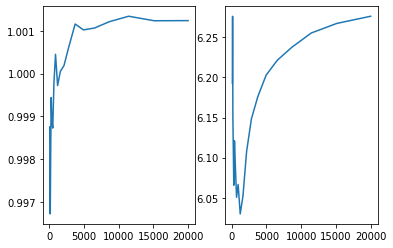

The gap here should be fisher info right?

Text(0, 0.5, 'std single param')

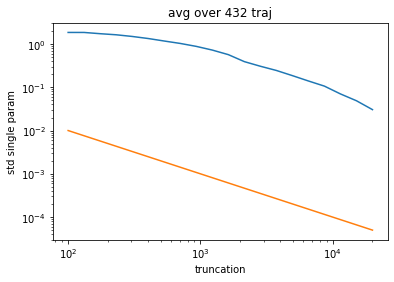